In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils
# reload(utils)
import json
from collections import Counter, defaultdict
%matplotlib inline

In [3]:
logs = utils.loadlogs()

In [6]:
df_news = pd.read_pickle("df_news.pkl")

In [4]:
recs = []
for ulog in logs:
    userid = ulog['studentID']
    topic_pref = ulog['pre_questions']
    topic_pref_post = ulog['post_questions']
    
    for ti, topic in enumerate([u'社会', u'娱乐', u'体育', u'科技', u'历史']):
        recs.append((userid, topic, int(topic_pref[topic][0]), int(topic_pref_post["topic-"+str(ti+1)][0])))
df_topic = pd.DataFrame.from_records(recs, columns=['userid', 'topic', 'pre-topic-pref', 'post-topic-pref'])

In [7]:
recs = []
for tu, tdf in df_news.groupby("userid"):
    for ti, topic in enumerate([u'社会', u'娱乐', u'体育', u'科技', u'历史']):
        tnum = len(tdf[tdf['ifclick'] & (tdf['topic'] == topic)])
        
        read_pref = np.mean(tdf[tdf['ifclick'] & (tdf['topic'] == topic)]['read_pref'])
        equality = np.mean(tdf[tdf['ifclick'] & (tdf['topic'] == topic)]['equality'])

        suprise = len(tdf[tdf['ifclick'] & (tdf['topic'] == topic) & (tdf['pre_pref']<=tdf['read_pref'])])
        dissuprise = len(tdf[tdf['ifclick'] & (tdf['topic'] == topic) & (tdf['pre_pref']>tdf['read_pref'])])
        
        recs.append((tu, topic, tnum, suprise, dissuprise, read_pref, equality))
df_topic_clk = pd.DataFrame.from_records(recs, columns=['userid', 'topic', 'clk_num', 'pre<=read', 'pre>read', 'avg_read_pref', 'equality'])

In [8]:
df_merge = df_topic.merge(df_topic_clk, on=['userid', 'topic'], how="left")

In [9]:
df_merge['post-pre'] = df_merge['post-topic-pref'] - df_merge['pre-topic-pref']

([<matplotlib.axis.XTick at 0x7f522776d810>,
 <a list of 9 Text xticklabel objects>)

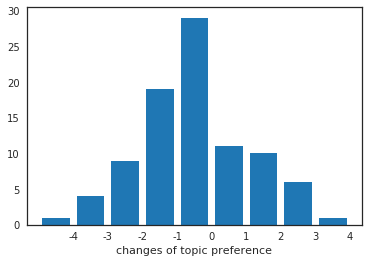

In [10]:
sns.set_context("notebook")
sns.set_style("white")
plt.bar(range(-4, 5), [Counter(df_merge['post-pre'])[t] for t in range(-4, 5)])
plt.xlabel("changes of topic preference")
plt.xticks(np.arange(-4, 5)+0.5, range(-4, 5))

In [13]:
df_merge.corr()[['pre-topic-pref', 'post-topic-pref', 'post-pre']]

,pre-topic-pref,post-topic-pref,post-pre
pre-topic-pref,1.000000,0.391853,-0.607486
post-topic-pref,0.391853,1.000000,0.492761
clk_num,0.376546,0.234241,-0.153900
pre<=read,0.231155,0.217983,-0.030426
pre>read,0.409543,0.128990,-0.275981
avg_read_pref,0.031038,0.185820,0.131077
equality,-0.082078,0.113247,0.175405
post-pre,-0.607486,0.492761,1.000000
